### training the BrainAlignNet

In [1]:
import os
os.chdir("../scripts")

In [2]:
from train import set_GPU, fit_deepreg
# import train

2025-02-24 20:18:48.176732: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-24 20:18:48.176780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-24 20:18:48.178348: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
base = "/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet"
# config_path = f"{base}/demo_notebook/long_first_jelly/config_used_second.yaml"
config_path = f"{base}/demo_notebook/jelly_config_double_pad.yaml"
log_dir = f"{base}/demo_notebook"
# experiment_name = "long_first_jelly_again"
experiment_name = "first_double_padded"
max_epochs = 1000
initial_epoch = 0

In [4]:
%env DEEPREG_LOG_LEVEL=0
import tensorflow as tf
# tf.debugging.enable_check_numerics()
# tf.config.experimental_run_functions_eagerly(True)
set_GPU(3)
fit_deepreg(
    config_path,
    log_dir,
    experiment_name,
    max_epochs,
    initial_epoch)


env: DEEPREG_LOG_LEVEL=0
2025-02-24 20:18:50 | WARNING  | Log directory /home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/first_double_padded exists already.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.
Built outputs.


I0000 00:00:1740428373.949895 2274631 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/1000
125/125 [==============================] - 190s 2s/step - loss: -299.1614 - metric/moving_image_mean: 0.1565 - metric/moving_image_min: 0.0000e+00 - metric/moving_image_max: 1.0000 - metric/fixed_image_mean: 0.1575 - metric/fixed_image_min: 0.0000e+00 - metric/fixed_image_max: 1.0000 - loss/image_LocalNormalizedCrossCorrelationLoss: -0.3002 - loss/image_LocalNormalizedCrossCorrelationLoss_weighted: -300.1619 - metric/moving_label_mean: -1.0000 - metric/moving_label_min: -1.0000 - metric/moving_label_max: -1.0000 - metric/fixed_label_mean: -1.0000 - metric/fixed_label_min: -1.0000 - metric/fixed_label_max: -1.0000 - loss/label_CentroidDistance: 1.0000 - loss/label_CentroidDistance_weighted: 1.0000 - loss/regularization_HybridNorm: 6.0589e-04 - loss/regularization_HybridNorm_weighted: 6.0589e-04 - metric/ddf_mean: -0.2411 - metric/ddf_min: -1.1049 - metric/ddf_max: 0.0010 - val_loss: -320.7212 - val_metric/moving_image_mean: 0.0498 - val_metric/moving_image_min: 0.0000e+00 -

Traceback (most recent call last):
  File "/home/brian/.conda/envs/PB/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
  File "/tmp/ipykernel_2273980/1181108158.py", line 6, in <module>
    fit_deepreg(
  File "/home/flv_admin/Dropbox/AllNotebook/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/scripts/train.py", line 98, in fit_deepreg
    history = model.fit(
              ^^^^^^^^^^
  File "/home/brian/.conda/envs/PB/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/home/brian/.conda/envs/PB/lib/python3.11/site-packages/keras/src/engine/training.py", line 1813, in fit
    callbacks.on_train_batch_end(end_step, logs)
  File "/home/brian/.conda/envs/PB/lib/python3.11/site-packages/keras/src/callbacks.py", line 475, in on_train_batch_end
    self._call_batch_hook(ModeKeys.TRAIN, "end", batch, logs=logs)
  File "/home/brian/.conda/envs/P

### register test (unseen) images with checkpoint (weights of the trained network)

In [3]:
from register import set_GPU, register

2025-02-21 15:22:56.347654: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 15:22:56.384774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-21 15:22:56.384811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-21 15:22:56.386390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 15:22:56.393909: I tensorflow/core/platform/cpu_feature_guar

In [4]:
model_config_path = config_path
# model_ckpt_path = f"/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/demo_data/save/ckpt-300"
model_ckpt_path = f"/home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/long_first_jelly/save/ckpt-129"

In [5]:
set_GPU(3)
registered_outputs = register(model_config_path, model_ckpt_path)

/home/brian/data4/brian/PBnJ/archive_pre_datadump/jelly_processed_data/mixed_lab_padded/val/fixed_images.h5


  0%|          | 0/5 [00:00<?, ?it/s]2025-02-21 15:22:58.566051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46576 MB memory:  -> device: 3, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:c2:00.0, compute capability: 8.9


2025-02-21 15:22:59 | WARNING  | Log directory outputs/outputs exists already.
2025-02-21 15:22:59 | WARNING  | Using customized configuration. The code might break if the config doesn't match the saved model.
Built inputs.
Built control points.
Concatenated images.
{'extract_levels': ListWrapper([0, 1, 2, 3]), 'name': 'local', 'num_channel_initial': 16}
Built backbone.
Built DDF.
Built warping.


  0%|          | 0/5 [00:03<?, ?it/s]


NotFoundError: Error when restoring from checkpoint or SavedModel at /home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/long_first_jelly/save/ckpt-129: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /home/brian/notebooks/brian/PBrainAlign_and_Jelly/private_BrainAlignNet/demo_notebook/long_first_jelly/save/ckpt-129
Please double-check that the path is correct. You may be missing the checkpoint suffix (e.g. the '-1' in 'path/to/ckpt-1').

#### plot registered outputs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
experiment = 'val'
# experiment = 'stripes'
registered_outputs.keys()
# registered_outputs[experiment].keys()

dict_keys(['3563to15011', '5004to15011', '6739to15011', '8110to15011', '985to15011'])

In [6]:
registration_prob = '3563to15011'
output_dict = registered_outputs[experiment][registration_prob]
warped_moving_image = output_dict['warped_moving_image']
warped_moving_roi = output_dict['warped_moving_roi']
warped_moving_centroids = output_dict['warped_moving_centroids']

NameError: name 'registered_outputs' is not defined

In [49]:
output_dict.keys()

dict_keys(['warped_moving_image', 'warped_moving_roi', 'warped_moving_centroids'])

In [50]:
warped_moving_image.shape, warped_moving_roi.shape, warped_moving_centroids.shape

((1080, 1080, 2), (1080, 1080, 2), (200, 3))

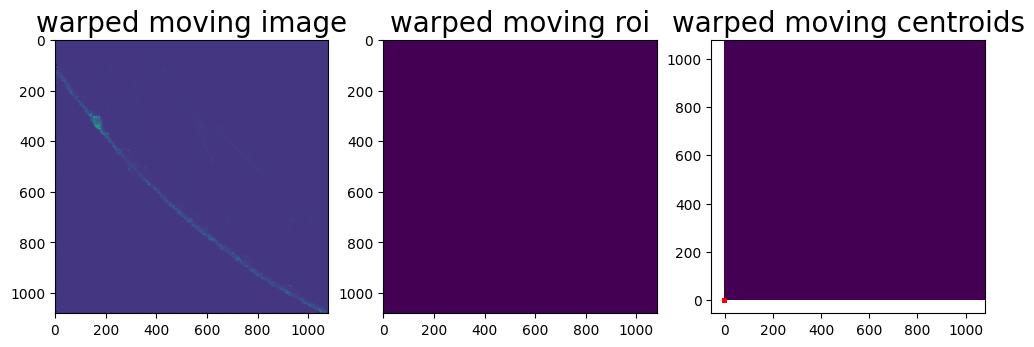

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
if len(warped_moving_image.shape) == 2:
    axes[0].imshow(warped_moving_image);
else:
    axes[0].imshow(warped_moving_image.max(2));
axes[0].set_title("warped moving image", fontsize=20);
axes[1].imshow(warped_moving_roi.max(2));
axes[1].set_title("warped moving roi", fontsize=20);

axes[2].imshow(warped_moving_roi.max(2));
axes[2].set_title("warped moving roi", fontsize=20);

xs = [x for (x, _, _) in warped_moving_centroids]
ys = [y for (_, y, _) in warped_moving_centroids]


axes[2].scatter(ys, xs, s=5, c='r');
axes[2].set_title("warped moving centroids", fontsize=20);
# axes[2].set_xlim(0, 120);
# axes[2].set_ylim(0, 284);
axes[2].invert_yaxis()

In [52]:
import h5py
test_path = "/home/brian/data4/brian/PBnJ/jelly_processed_data/mixed_lab_padded"

with h5py.File(os.path.join(test_path, "moving_images.h5"), 'r') as f:
    mov_img = f[registration_prob][:]

with h5py.File(os.path.join(test_path, "fixed_images.h5"), 'r') as f:
    fix_img = f[registration_prob][:]


with h5py.File(os.path.join(test_path, "fixed_labels.h5"), 'r') as f:
    fix_labs = f[registration_prob][:]

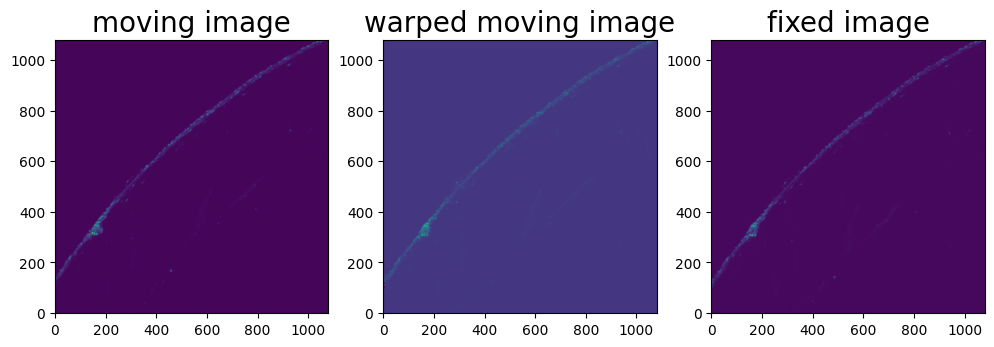

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
if len(mov_img.shape) == 2:
    axes[0].imshow(mov_img)
else:
    axes[0].imshow(mov_img.max(2))
axes[0].set_title("moving image", fontsize=20)
if len(warped_moving_image.shape) == 2:
    axes[1].imshow(warped_moving_image)
else:
    axes[1].imshow(warped_moving_image[...,1])
axes[1].set_title("warped moving image", fontsize=20)

if len(fix_img.shape) == 2:
    axes[2].imshow(fix_img)
else:
    axes[2].imshow(fix_img.max(2))

xs = [x for (x, _, _) in warped_moving_centroids]
ys = [y for (_, y, _) in warped_moving_centroids]


# axes[1].scatter(ys, xs, s=5, c='r')


xs = [x for (x, _, _) in fix_labs if x >= 0]
ys = [y for (_, y, _) in fix_labs if y >= 0]

axes[2].set_title("fixed image", fontsize=20)
# axes[2].scatter(xs, ys, s=5, c='g')
# axes[2].set_xlim(0, 120)
# axes[2].set_ylim(0, 284)
axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[2].invert_yaxis()

In [ ]:
norm_fix = (fix_img[...,1] - fix_img[...,1].min()) / (fix_img[...,1].max() - fix_img[...,1].min())
norm_mov = (mov_img[...,1] - mov_img[...,1].min()) / (mov_img[...,1].max() - mov_img[...,1].min())
norm_warp = (warped_moving_image[...,1] - warped_moving_image[...,1].min()) / (warped_moving_image[...,1].max() - warped_moving_image[...,1].min())


Text(0.5, 1.0, 'Moving Overlaid on Fixed')

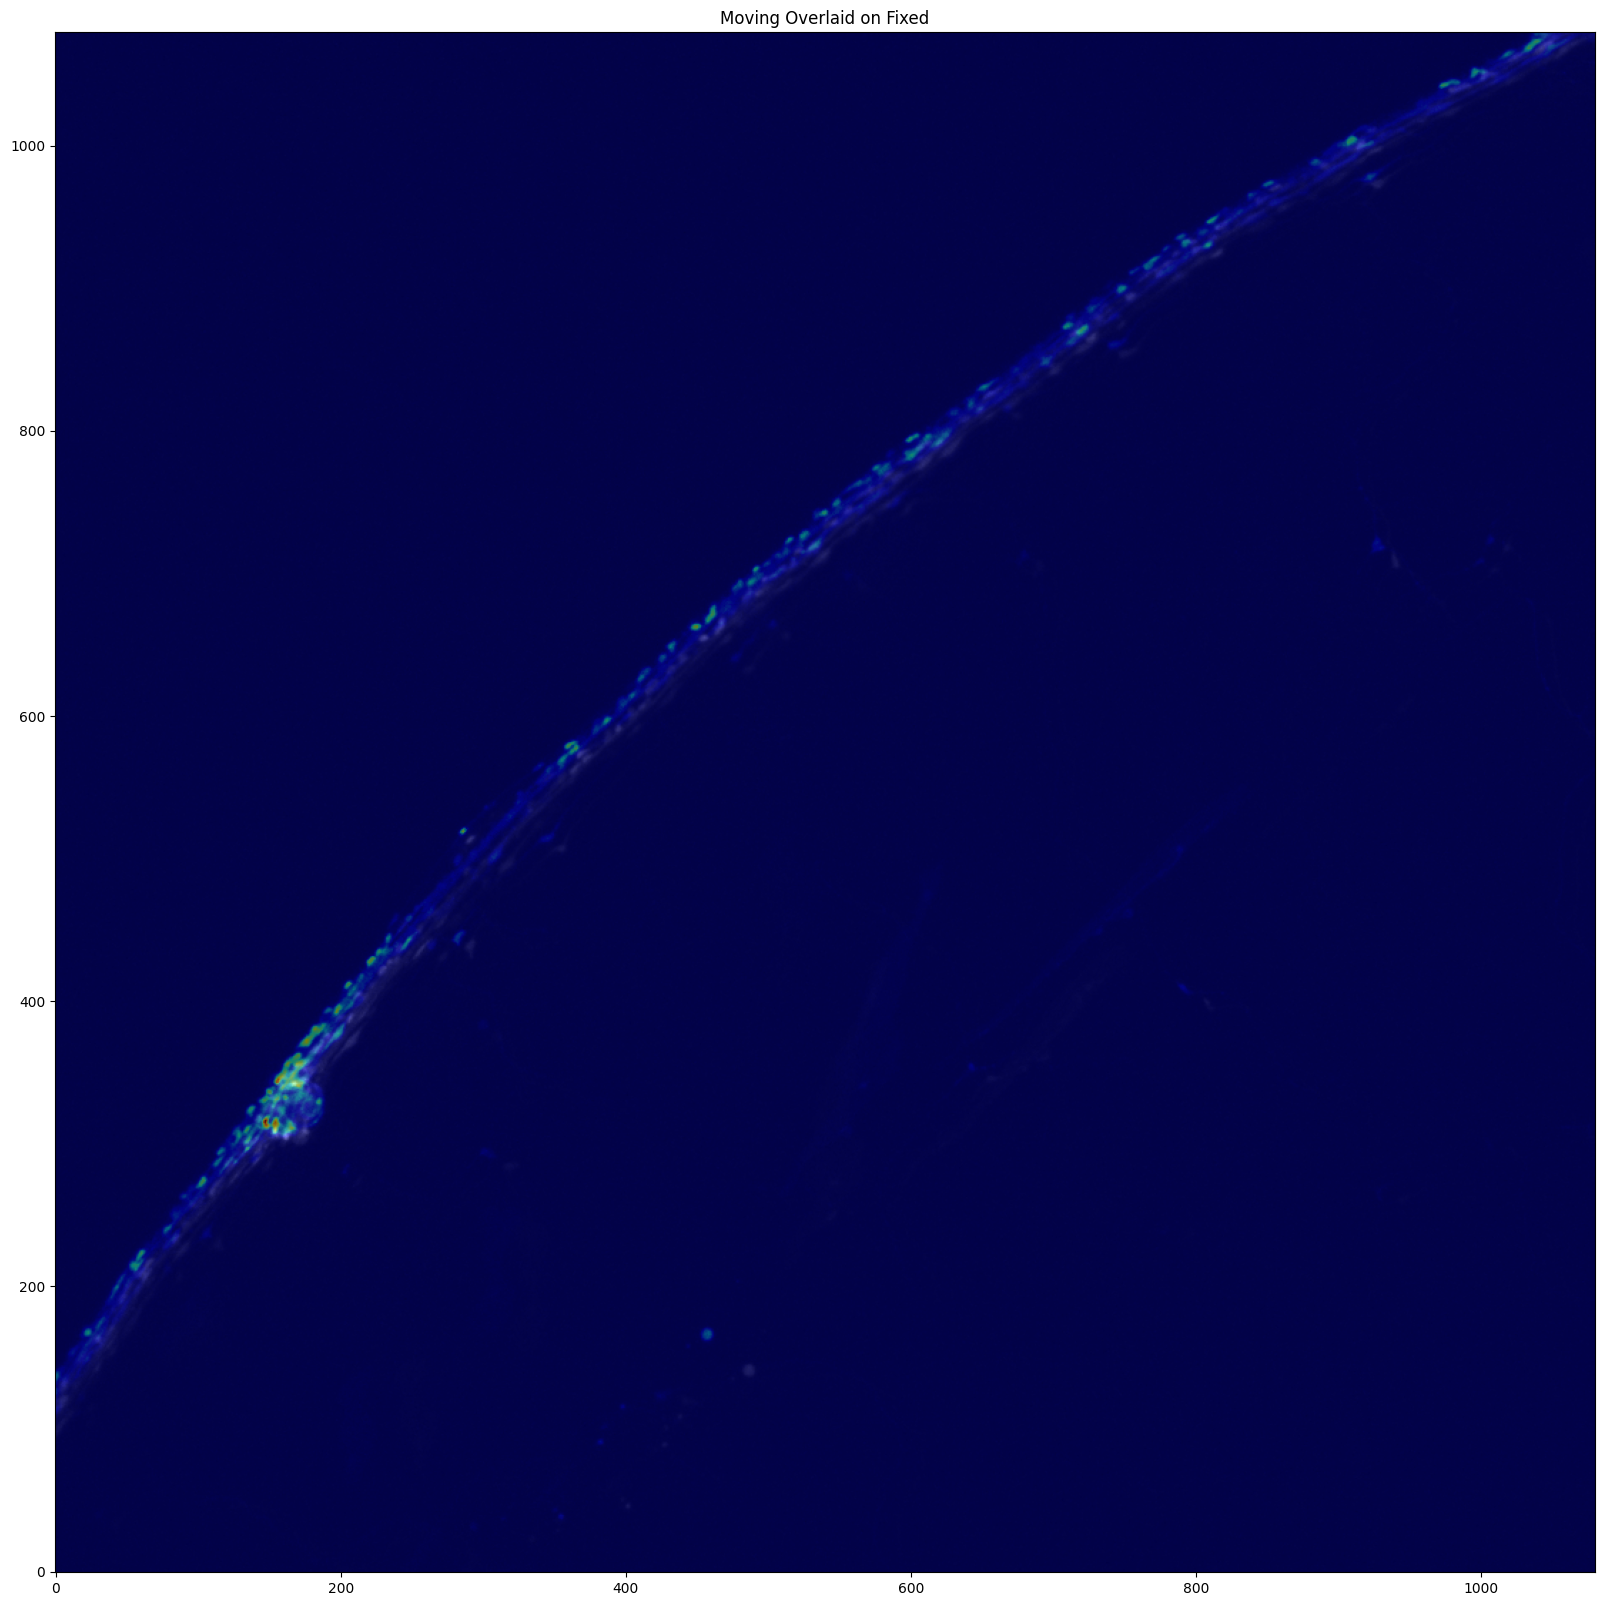

In [57]:
fig, ax = plt.subplots(1, figsize=(20, 20))

ax.imshow(norm_fix, cmap='gray')
ax.imshow(norm_mov, cmap='jet', alpha=0.5)

ax.invert_yaxis()
ax.set_title("Moving Overlaid on Fixed")

Text(0.5, 1.0, 'Warped Overlaid on Fixed')

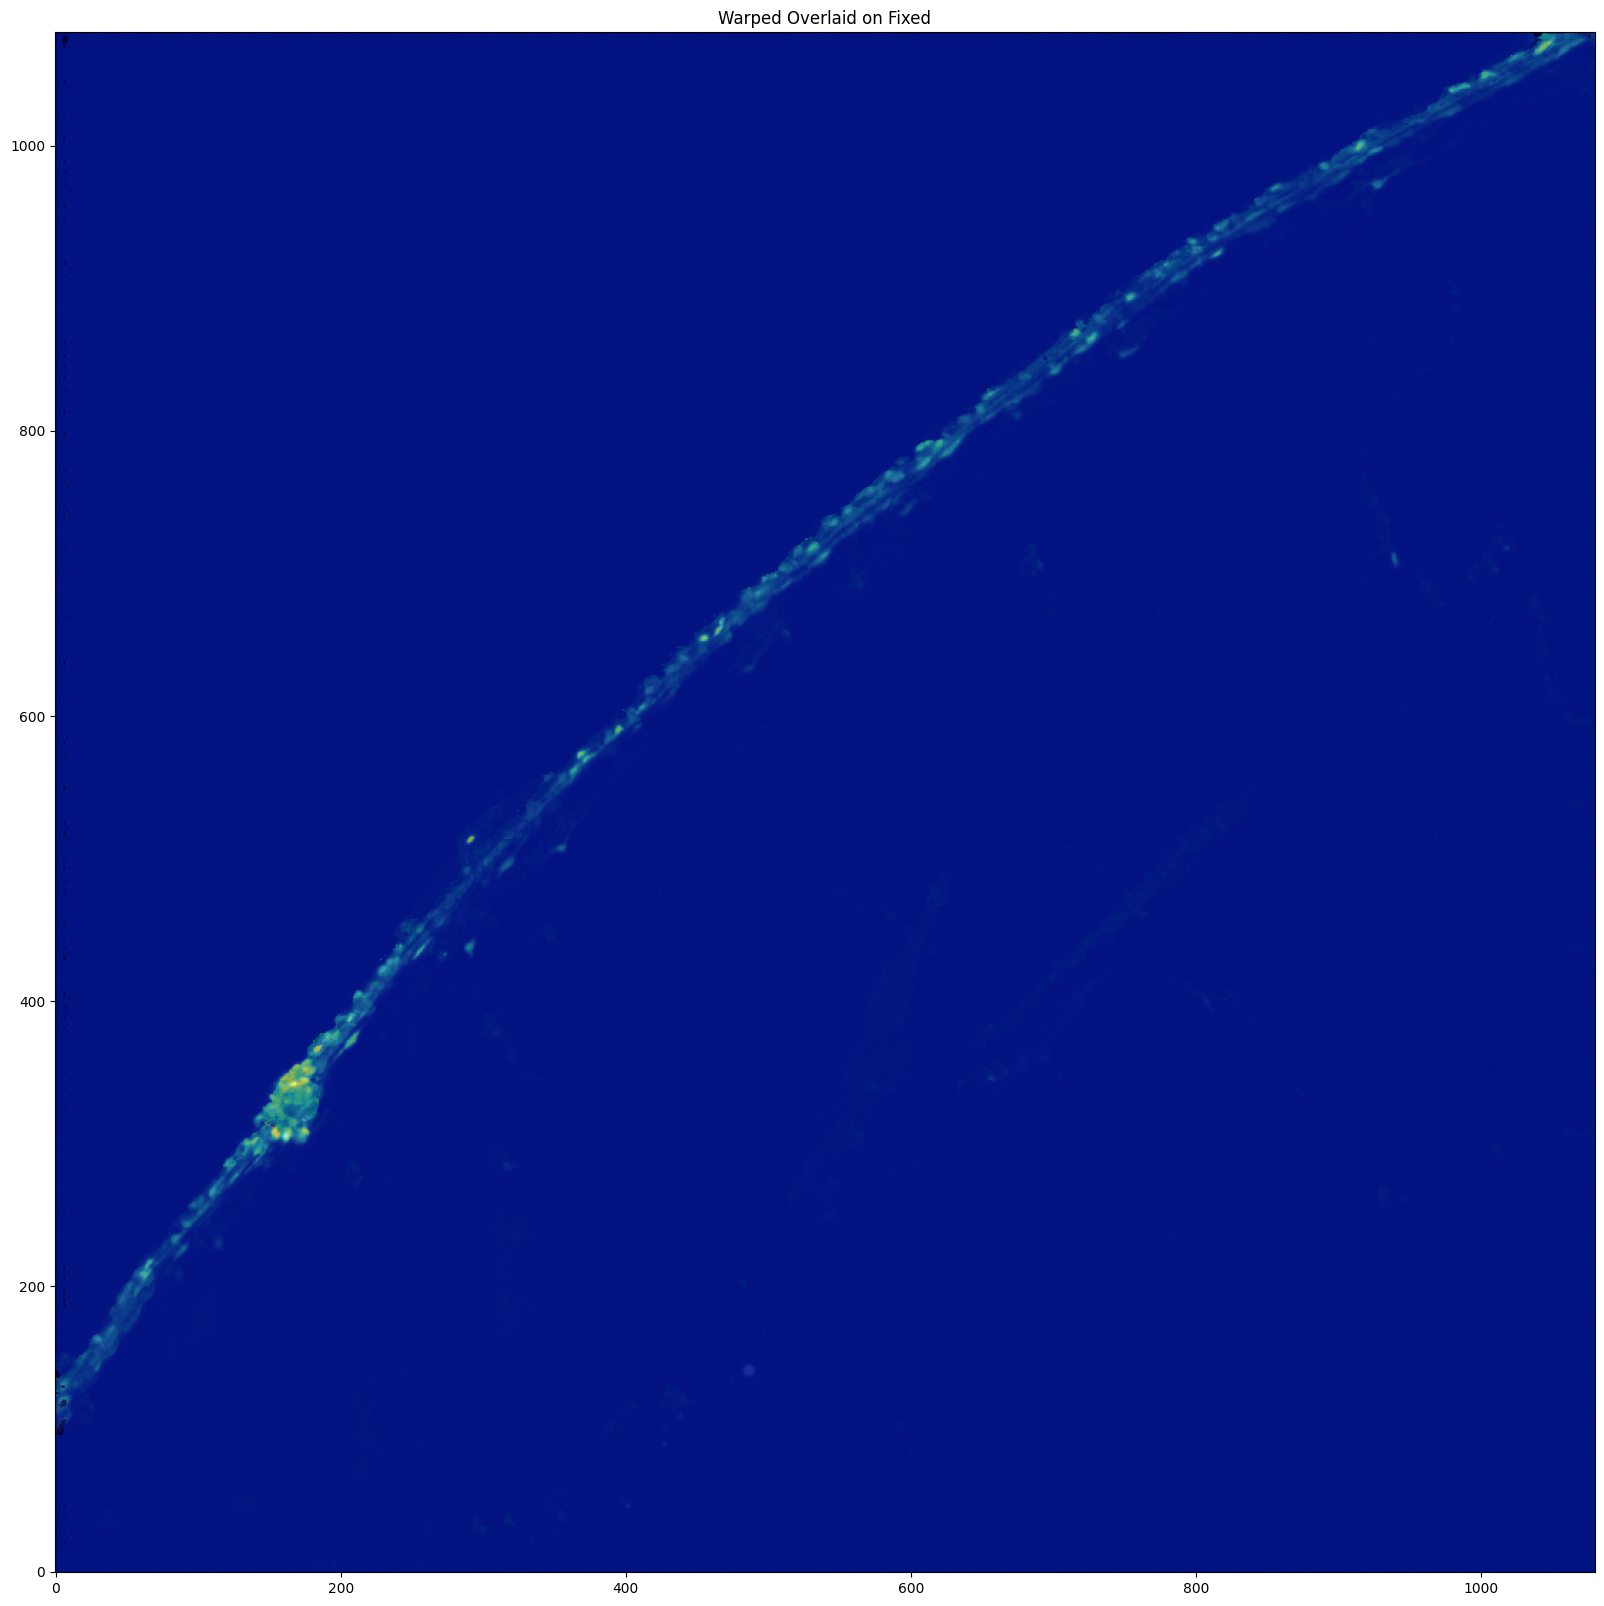

In [58]:
fig, ax = plt.subplots(1, figsize=(20, 20))

ax.imshow(norm_fix, cmap='gray')
ax.imshow(norm_warp, cmap='jet', alpha=0.5)

ax.invert_yaxis()
ax.set_title("Warped Overlaid on Fixed")

Text(0.5, 1.0, 'Pixelwise difference between warped and fixed')

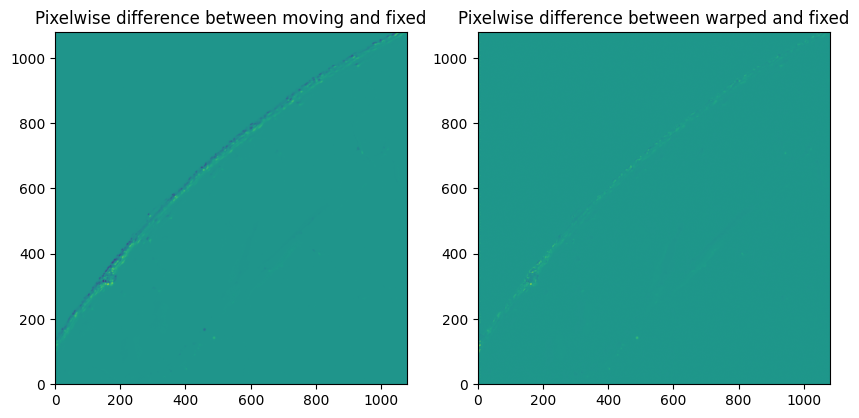

In [56]:
fig, axes = plt.subplots(1,2, figsize=(10, 10))
axes[0].imshow(norm_fix - norm_mov)
axes[1].imshow(norm_fix - norm_warp)

axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[0].set_title("Pixelwise difference between moving and fixed")
axes[1].set_title("Pixelwise difference between warped and fixed")